IMPORT **LIBRARY**



In [1]:
# !pip install sastrawi
# # !pip install tweepy

import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# nltk.download('stopwords')
# from nltk.corpus import stopwords

MENGHITUNG JUMLAH KELAS AA (Positif-Positif) HINGGA CC (Netral-Netral) untuk menghitung Confusion Matrix 3 dimensi

InSet awal

In [2]:
data = pd.read_csv('twitter-data-preprocess.csv')

# Membaca kamus sentimen dari file TSV
positive_dict = pd.read_csv('positive-0.tsv', delimiter='\t')
print(len(positive_dict))
negaive_dict = pd.read_csv('negative-0.tsv', delimiter='\t')
print(len(negaive_dict))

# Menggabungkan kedua DataFrame menjadi satu
sentiment_dict = pd.concat([positive_dict, negaive_dict])

# Membuat kamus dari kamus sentimen
sentiment_scores = dict(zip(sentiment_dict['word'], sentiment_dict['weight']))

# Fungsi untuk menghitung skor sentimen
def calculate_sentiment(text):
    words = text.split()
    score = 0
    for word in words:
        if word in sentiment_scores:
            print(f"Kata: {word}, Bobot: {sentiment_scores[word]}")
            score += sentiment_scores[word]
            print(score)
    return score

# Menambahkan kolom sentimen ke data
data['sentiment_score'] = data['pre-process'].apply(calculate_sentiment)

# Interpretasi sentimen
def interpret_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

def buzzer_sentiment(sentiment):
  if sentiment == 'Positif':
    return 'Kalimat bukan termasuk buzzer'
  elif sentiment == 'Negatif':
    return 'Kalimat termasuk buzzer'
  else :
    return "Kalimat bersifat netral"

# Menambahkan kolom interpretasi sentimen
data['sentiment'] = data['sentiment_score'].apply(interpret_sentiment)

# Menyimpan data yang telah dianalisis
data.to_csv('analyzed_data-0.csv', index=False)

3609
6609
Kata: tega, Bobot: -5
-5
Kata: soal, Bobot: -1
-6
Kata: lindung, Bobot: 4
-2
Kata: aja, Bobot: 1
-1
Kata: lindung, Bobot: 4
3
Kata: soal, Bobot: -1
-1
Kata: lindung, Bobot: 4
3
Kata: jawab, Bobot: -5
-2
Kata: sendiri, Bobot: -3
-5
Kata: rugi, Bobot: -5
-5
Kata: naik, Bobot: 1
-4
Kata: pa, Bobot: -5
-5
Kata: nanya, Bobot: -1
-6
Kata: pa, Bobot: -5
-11
Kata: senyum, Bobot: -1
-12
Kata: rem, Bobot: -5
-17
Kata: lewat, Bobot: -5
-5
Kata: walau, Bobot: -3
-8
Kata: terima, Bobot: 2
-6
Kata: kasih, Bobot: -1
-7
Kata: doang, Bobot: -1
-8
Kata: masuk, Bobot: -3
-3
Kata: ken, Bobot: -2
-5
Kata: nang, Bobot: -5
-10
Kata: jawab, Bobot: -5
-5
Kata: tidak, Bobot: -5
-10
Kata: kurang, Bobot: -3
-3
Kata: jangan, Bobot: -3
-3
Kata: tanya, Bobot: -2
-5
Kata: soal, Bobot: -1
-6
Kata: dia, Bobot: -3
-9
Kata: aja, Bobot: 1
-8
Kata: punya, Bobot: 3
-5
Kata: jadi, Bobot: -2
-2
Kata: percaya, Bobot: 2
0
Kata: ganjar, Bobot: -3
-3
Kata: dah, Bobot: -3
-6
Kata: bukan, Bobot: -3
-3
Kata: yang, Bobot: -

In [2]:
# Membaca kedua dataset
data1 = pd.read_csv('sentimen-pub-pre-process-actual.csv')
data2 = pd.read_csv('analyzed_data-0.csv')

# Mendefinisikan variabel untuk menyimpan hasil perbandingan
AA = 0
AB = 0
AC = 0
BA = 0
BB = 0
BC = 0
CA = 0
CB = 0
CC = 0

# Membandingkan nilai sentimen pada baris yang sama di kedua dataset
for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Positif':
        if sentiment2 == 'Positif':
            AA += 1
        elif sentiment2 == 'Negatif':
            AB += 1
        elif sentiment2 == 'Netral':
            AC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Negatif':
        if sentiment2 == 'Positif':
            BA += 1
        elif sentiment2 == 'Negatif':
            BB += 1
        elif sentiment2 == 'Netral':
            BC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Netral':
        if sentiment2 == 'Positif':
            CA += 1
        elif sentiment2 == 'Negatif':
            CB += 1
        elif sentiment2 == 'Netral':
            CC += 1

# Menampilkan hasil perbandingan
print("Kelas AA:", AA)
print("Kelas AB:", AB)
print("Kelas AC:", AC)
print("Kelas BA:", BA)
print("Kelas BB:", BB)
print("Kelas BC:", BC)
print("Kelas CA:", CA)
print("Kelas CB:", CB)
print("Kelas CC:", CC)
totalabc = AA+BB+CC
print(totalabc)
total = len(data1)
print(total)
ACC0 = ((AA+BB+CC)/total)*100
print('Total data sama : ', ACC0,'%')

Kelas AA: 103
Kelas AB: 473
Kelas AC: 32
Kelas BA: 23
Kelas BB: 327
Kelas BC: 6
Kelas CA: 9
Kelas CB: 54
Kelas CC: 3
433
1030
Total data sama :  42.03883495145631 %


In [3]:
# Confussion matrix 3 dimensi
# Sesuai jurnal
CM = (AA+BB+CC)/(total)
print(AA+BB+CC)
print(CM)

# Menurut https://www.pengalaman-edukasi.com/2020/11/menghitung-confusion-matrix-3-kelas.html
#             Prediksi
# Aktual    TP      FP
#           FN      TP

# Menghitung all accuracy
# Accuracy dipengaruhi oleh jumhlah data yang sama antara data prediksi dan aktual
TP = AA+BB+CC
Accuracy = TP/total

# Menghitung all Precision
# Precision dipengaruhi oleh FP (FALSE POSITIVE) dimana FP merupakan kelas aktual nya TRUE ttp prediksi FALSE
FPA = AB+AC
# print(FPA)
PA = AA/(AA+FPA)
# print(PA)
FPB = BA+BC
# print(FPB)
PB = BB/(BB+FPB)
# print(PB)
FPC = CA+CB
# print(FPC)
PC = CC/(CC+FPC)
# print(PC)
Precision = (PA + PB + PC)/3

# Menghitung all recall
# Recall dipengaruhi FN (FALSE NEGATFIF) dimna FN merupakan kelas aktual nya FALSE dan prediksi nya FALSE
print('recall')
FNA = BA+CA
# print(FNA)
RA = AA/(AA+FNA)
# print(RA)
FNB = AB+CB
# print(FNB)
RB = BB/(BB+FNB)
# print(RB)
FNC = AC+BC
# print(FNC)
RC = CC/(CC+FNC)
# print(RC)

Recall = (RA + RB + RC)/3

# Menghitung F1-Score
F1score = (2*Recall*Precision)/(Recall+Precision)

print('Accuracy : ', Accuracy, '== ', Accuracy*100, '%')
print('Precision : ', Precision, '== ', Precision*100, '%')
print('Recall : ', Recall, '== ', Recall*100, '%')
print('F1-Score : ', F1score, '== ', F1score*100, '%')

433
0.4203883495145631
recall
Accuracy :  0.4203883495145631 ==  42.03883495145631 %
Precision :  0.377800588678028 ==  37.7800588678028 %
Recall :  0.4063458919783057 ==  40.634589197830564 %
F1-Score :  0.3915536726449562 ==  39.155367264495624 %


100 kata

In [4]:
data = pd.read_csv('twitter-data-preprocess.csv')

# Membaca kamus sentimen dari file TSV
positive_dict = pd.read_csv('positive-50.tsv', delimiter='\t')
print(len(positive_dict))
negaive_dict = pd.read_csv('negative-50.tsv', delimiter='\t')
print(len(negaive_dict))

# Menggabungkan kedua DataFrame menjadi satu
sentiment_dict = pd.concat([positive_dict, negaive_dict])

# Membuat kamus dari kamus sentimen
sentiment_scores = dict(zip(sentiment_dict['word'], sentiment_dict['weight']))

# Fungsi untuk menghitung skor sentimen
def calculate_sentiment(text):
    words = text.split()
    score = 0
    for word in words:
        if word in sentiment_scores:
            # print(f"Kata: {word}, Bobot: {sentiment_scores[word]}")
            score += sentiment_scores[word]
            # print(score)
    return score

# Menambahkan kolom sentimen ke data
data['sentiment_score'] = data['pre-process'].apply(calculate_sentiment)

# Interpretasi sentimen
def interpret_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

def buzzer_sentiment(sentiment):
  if sentiment == 'Positif':
    return 'Kalimat bukan termasuk buzzer'
  elif sentiment == 'Negatif':
    return 'Kalimat termasuk buzzer'
  else :
    return "Kalimat bersifat netral"

# Menambahkan kolom interpretasi sentimen
data['sentiment'] = data['sentiment_score'].apply(interpret_sentiment)

# Menyimpan data yang telah dianalisis
data.to_csv('analyzed_data-50.csv', index=False)

# Membaca kedua dataset
data1 = pd.read_csv('sentimen-pub-pre-process-actual.csv')
data2 = pd.read_csv('analyzed_data-50.csv')

# Mendefinisikan variabel untuk menyimpan hasil perbandingan
AA = 0
AB = 0
AC = 0
BA = 0
BB = 0
BC = 0
CA = 0
CB = 0
CC = 0

# Membandingkan nilai sentimen pada baris yang sama di kedua dataset
for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Positif':
        if sentiment2 == 'Positif':
            AA += 1
        elif sentiment2 == 'Negatif':
            AB += 1
        elif sentiment2 == 'Netral':
            AC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Negatif':
        if sentiment2 == 'Positif':
            BA += 1
        elif sentiment2 == 'Negatif':
            BB += 1
        elif sentiment2 == 'Netral':
            BC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Netral':
        if sentiment2 == 'Positif':
            CA += 1
        elif sentiment2 == 'Negatif':
            CB += 1
        elif sentiment2 == 'Netral':
            CC += 1

# Menampilkan hasil perbandingan
print("Kelas AA:", AA)
print("Kelas AB:", AB)
print("Kelas AC:", AC)
print("Kelas BA:", BA)
print("Kelas BB:", BB)
print("Kelas BC:", BC)
print("Kelas CA:", CA)
print("Kelas CB:", CB)
print("Kelas CC:", CC)
totalabc = AA+BB+CC
print(totalabc)
total = len(data1)
print(total)
ACC100 = ((AA+BB+CC)/total)*100
print('Total data sama : ', ((AA+BB+CC)/total)*100,'%')

# Confussion matrix 3 dimensi
# Sesuai jurnal
CM = (AA+BB+CC)/(total)
print(AA+BB+CC)
print(CM)

# Menurut https://www.pengalaman-edukasi.com/2020/11/menghitung-confusion-matrix-3-kelas.html
#             Prediksi
# Aktual    TP      FP
#           FN      TP

# Menghitung all accuracy
# Accuracy dipengaruhi oleh jumhlah data yang sama antara data prediksi dan aktual
TP = AA+BB+CC
Accuracy = TP/total

# Menghitung all Precision
# Precision dipengaruhi oleh FP (FALSE POSITIVE) dimana FP merupakan kelas aktual nya TRUE ttp prediksi FALSE
FPA = AB+AC
# print(FPA)
PA = AA/(AA+FPA)
# print(PA)
FPB = BA+BC
# print(FPB)
PB = BB/(BB+FPB)
# print(PB)
FPC = CA+CB
# print(FPC)
PC = CC/(CC+FPC)
# print(PC)
Precision = (PA + PB + PC)/3

# Menghitung all recall
# Recall dipengaruhi FN (FALSE NEGATFIF) dimna FN merupakan kelas aktual nya FALSE dan prediksi nya FALSE
print('recall')
FNA = BA+CA
# print(FNA)
RA = AA/(AA+FNA)
# print(RA)
FNB = AB+CB
# print(FNB)
RB = BB/(BB+FNB)
# print(RB)
FNC = AC+BC
# print(FNC)
RC = CC/(CC+FNC)
# print(RC)

Recall = (RA + RB + RC)/3

# Menghitung F1-Score
F1score = (2*Recall*Precision)/(Recall+Precision)

print('Accuracy : ', Accuracy, '== ', Accuracy*100, '%')
print('Precision : ', Precision, '== ', Precision*100, '%')
print('Recall : ', Recall, '== ', Recall*100, '%')
print('F1-Score : ', F1score, '== ', F1score*100, '%')

3649
6536
Kelas AA: 520
Kelas AB: 64
Kelas AC: 24
Kelas BA: 95
Kelas BB: 239
Kelas BC: 22
Kelas CA: 32
Kelas CB: 29
Kelas CC: 5
764
1030
Total data sama :  74.1747572815534 %
764
0.7417475728155339
recall
Accuracy :  0.7417475728155339 ==  74.1747572815534 %
Precision :  0.5341230160863514 ==  53.41230160863514 %
Recall :  0.5405427206294645 ==  54.05427206294645 %
F1-Score :  0.5373136937415538 ==  53.73136937415538 %


200 kata

In [6]:
data = pd.read_csv('twitter-data-preprocess.csv')

# Membaca kamus sentimen dari file TSV
positive_dict = pd.read_csv('positive-100.tsv', delimiter='\t')
print(len(positive_dict))
negaive_dict = pd.read_csv('negative-100.tsv', delimiter='\t')
print(len(negaive_dict))

# Menggabungkan kedua DataFrame menjadi satu
sentiment_dict = pd.concat([positive_dict, negaive_dict])

# Membuat kamus dari kamus sentimen
sentiment_scores = dict(zip(sentiment_dict['word'], sentiment_dict['weight']))

# Fungsi untuk menghitung skor sentimen
def calculate_sentiment(text):
    words = text.split()
    score = 0
    for word in words:
        if word in sentiment_scores:
            # print(f"Kata: {word}, Bobot: {sentiment_scores[word]}")
            score += sentiment_scores[word]
            # print(score)
    return score

# Menambahkan kolom sentimen ke data
data['sentiment_score'] = data['pre-process'].apply(calculate_sentiment)

# Interpretasi sentimen
def interpret_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

def buzzer_sentiment(sentiment):
  if sentiment == 'Positif':
    return 'Kalimat bukan termasuk buzzer'
  elif sentiment == 'Negatif':
    return 'Kalimat termasuk buzzer'
  else :
    return "Kalimat bersifat netral"

# Menambahkan kolom interpretasi sentimen
data['sentiment'] = data['sentiment_score'].apply(interpret_sentiment)

# Menyimpan data yang telah dianalisis
data.to_csv('analyzed_data-100.csv', index=False)

# Membaca kedua dataset
data1 = pd.read_csv('sentimen-pub-pre-process-actual.csv')
data2 = pd.read_csv('analyzed_data-100.csv')

# Mendefinisikan variabel untuk menyimpan hasil perbandingan
AA = 0
AB = 0
AC = 0
BA = 0
BB = 0
BC = 0
CA = 0
CB = 0
CC = 0

# Membandingkan nilai sentimen pada baris yang sama di kedua dataset
for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Positif':
        if sentiment2 == 'Positif':
            AA += 1
        elif sentiment2 == 'Negatif':
            AB += 1
        elif sentiment2 == 'Netral':
            AC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Negatif':
        if sentiment2 == 'Positif':
            BA += 1
        elif sentiment2 == 'Negatif':
            BB += 1
        elif sentiment2 == 'Netral':
            BC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Netral':
        if sentiment2 == 'Positif':
            CA += 1
        elif sentiment2 == 'Negatif':
            CB += 1
        elif sentiment2 == 'Netral':
            CC += 1

# Menampilkan hasil perbandingan
print("Kelas AA:", AA)
print("Kelas AB:", AB)
print("Kelas AC:", AC)
print("Kelas BA:", BA)
print("Kelas BB:", BB)
print("Kelas BC:", BC)
print("Kelas CA:", CA)
print("Kelas CB:", CB)
print("Kelas CC:", CC)
totalabc = AA+BB+CC
print(totalabc)
total = len(data1)
print(total)
ACC200 = ((AA+BB+CC)/total)*100
print('Total data sama : ', ACC200,'%')

# Confussion matrix 3 dimensi
# Sesuai jurnal
CM = (AA+BB+CC)/(total)
print(AA+BB+CC)
print(CM)

# Menurut https://www.pengalaman-edukasi.com/2020/11/menghitung-confusion-matrix-3-kelas.html
#             Prediksi
# Aktual    TP      FP
#           FN      TP

# Menghitung all accuracy
# Accuracy dipengaruhi oleh jumhlah data yang sama antara data prediksi dan aktual
TP = AA+BB+CC
Accuracy = TP/total

# Menghitung all Precision
# Precision dipengaruhi oleh FP (FALSE POSITIVE) dimana FP merupakan kelas aktual nya TRUE ttp prediksi FALSE
FPA = AB+AC
# print(FPA)
PA = AA/(AA+FPA)
# print(PA)
FPB = BA+BC
# print(FPB)
PB = BB/(BB+FPB)
# print(PB)
FPC = CA+CB
# print(FPC)
PC = CC/(CC+FPC)
# print(PC)
Precision = (PA + PB + PC)/3

# Menghitung all recall
# Recall dipengaruhi FN (FALSE NEGATFIF) dimna FN merupakan kelas aktual nya FALSE dan prediksi nya FALSE
print('recall')
FNA = BA+CA
# print(FNA)
RA = AA/(AA+FNA)
# print(RA)
FNB = AB+CB
# print(FNB)
RB = BB/(BB+FNB)
# print(RB)
FNC = AC+BC
# print(FNC)
RC = CC/(CC+FNC)
# print(RC)

Recall = (RA + RB + RC)/3

# Menghitung F1-Score
F1score = (2*Recall*Precision)/(Recall+Precision)

print('Accuracy : ', Accuracy, '== ', Accuracy*100, '%')
print('Precision : ', Precision, '== ', Precision*100, '%')
print('Recall : ', Recall, '== ', Recall*100, '%')
print('F1-Score : ', F1score, '== ', F1score*100, '%')

3698
6586
Kelas AA: 534
Kelas AB: 54
Kelas AC: 20
Kelas BA: 73
Kelas BB: 262
Kelas BC: 21
Kelas CA: 33
Kelas CB: 27
Kelas CC: 6
802
1030
Total data sama :  77.86407766990291 %
802
0.7786407766990291
recall
Accuracy :  0.7786407766990291 ==  77.86407766990291 %
Precision :  0.5683845402576923 ==  56.838454025769224 %
Recall :  0.5752943236565143 ==  57.52943236565143 %
F1-Score :  0.5718185584811106 ==  57.18185584811106 %


300 kata

In [7]:
data = pd.read_csv('twitter-data-preprocess.csv')

# Membaca kamus sentimen dari file TSV
positive_dict = pd.read_csv('positive-150.tsv', delimiter='\t')
print(len(positive_dict))
negaive_dict = pd.read_csv('negative-150.tsv', delimiter='\t')
print(len(negaive_dict))

# Menggabungkan kedua DataFrame menjadi satu
sentiment_dict = pd.concat([positive_dict, negaive_dict])

# Membuat kamus dari kamus sentimen
sentiment_scores = dict(zip(sentiment_dict['word'], sentiment_dict['weight']))

# Fungsi untuk menghitung skor sentimen
def calculate_sentiment(text):
    words = text.split()
    score = 0
    for word in words:
        if word in sentiment_scores:
            # print(f"Kata: {word}, Bobot: {sentiment_scores[word]}")
            score += sentiment_scores[word]
            # print(score)
    return score

# Menambahkan kolom sentimen ke data
data['sentiment_score'] = data['pre-process'].apply(calculate_sentiment)

# Interpretasi sentimen
def interpret_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

def buzzer_sentiment(sentiment):
  if sentiment == 'Positif':
    return 'Kalimat bukan termasuk buzzer'
  elif sentiment == 'Negatif':
    return 'Kalimat termasuk buzzer'
  else :
    return "Kalimat bersifat netral"

# Menambahkan kolom interpretasi sentimen
data['sentiment'] = data['sentiment_score'].apply(interpret_sentiment)

# Menyimpan data yang telah dianalisis
data.to_csv('analyzed_data-150.csv', index=False)

# Membaca kedua dataset
data1 = pd.read_csv('sentimen-pub-pre-process-actual.csv')
data2 = pd.read_csv('analyzed_data-150.csv')

# Mendefinisikan variabel untuk menyimpan hasil perbandingan
AA = 0
AB = 0
AC = 0
BA = 0
BB = 0
BC = 0
CA = 0
CB = 0
CC = 0

# Membandingkan nilai sentimen pada baris yang sama di kedua dataset
for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Positif':
        if sentiment2 == 'Positif':
            AA += 1
        elif sentiment2 == 'Negatif':
            AB += 1
        elif sentiment2 == 'Netral':
            AC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Negatif':
        if sentiment2 == 'Positif':
            BA += 1
        elif sentiment2 == 'Negatif':
            BB += 1
        elif sentiment2 == 'Netral':
            BC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Netral':
        if sentiment2 == 'Positif':
            CA += 1
        elif sentiment2 == 'Negatif':
            CB += 1
        elif sentiment2 == 'Netral':
            CC += 1

# Menampilkan hasil perbandingan
print("Kelas AA:", AA)
print("Kelas AB:", AB)
print("Kelas AC:", AC)
print("Kelas BA:", BA)
print("Kelas BB:", BB)
print("Kelas BC:", BC)
print("Kelas CA:", CA)
print("Kelas CB:", CB)
print("Kelas CC:", CC)
totalabc = AA+BB+CC
print(totalabc)
total = len(data1)
print(total)
ACC300 = ((AA+BB+CC)/total)*100
print('Total data sama : ', ACC300,'%')

# Confussion matrix 3 dimensi
# Sesuai jurnal
CM = (AA+BB+CC)/(total)
print(AA+BB+CC)
print(CM)

# Menurut https://www.pengalaman-edukasi.com/2020/11/menghitung-confusion-matrix-3-kelas.html
#             Prediksi
# Aktual    TP      FP
#           FN      TP

# Menghitung all accuracy
# Accuracy dipengaruhi oleh jumhlah data yang sama antara data prediksi dan aktual
TP = AA+BB+CC
Accuracy = TP/total

# Menghitung all Precision
# Precision dipengaruhi oleh FP (FALSE POSITIVE) dimana FP merupakan kelas aktual nya TRUE ttp prediksi FALSE
FPA = AB+AC
# print(FPA)
PA = AA/(AA+FPA)
# print(PA)
FPB = BA+BC
# print(FPB)
PB = BB/(BB+FPB)
# print(PB)
FPC = CA+CB
# print(FPC)
PC = CC/(CC+FPC)
# print(PC)
Precision = (PA + PB + PC)/3

# Menghitung all recall
# Recall dipengaruhi FN (FALSE NEGATFIF) dimna FN merupakan kelas aktual nya FALSE dan prediksi nya FALSE
print('recall')
FNA = BA+CA
# print(FNA)
RA = AA/(AA+FNA)
# print(RA)
FNB = AB+CB
# print(FNB)
RB = BB/(BB+FNB)
# print(RB)
FNC = AC+BC
# print(FNC)
RC = CC/(CC+FNC)
# print(RC)

Recall = (RA + RB + RC)/3

# Menghitung F1-Score
F1score = (2*Recall*Precision)/(Recall+Precision)

print('Accuracy : ', Accuracy, '== ', Accuracy*100, '%')
print('Precision : ', Precision, '== ', Precision*100, '%')
print('Recall : ', Recall, '== ', Recall*100, '%')
print('F1-Score : ', F1score, '== ', F1score*100, '%')

3748
6635
Kelas AA: 567
Kelas AB: 31
Kelas AC: 10
Kelas BA: 84
Kelas BB: 251
Kelas BC: 21
Kelas CA: 35
Kelas CB: 26
Kelas CC: 5
823
1030
Total data sama :  79.90291262135922 %
823
0.7990291262135922
recall
Accuracy :  0.7990291262135922 ==  79.90291262135922 %
Precision :  0.5711265150021803 ==  57.11265150021803 %
Recall :  0.5934515220229506 ==  59.34515220229506 %
F1-Score :  0.5820750328788716 ==  58.207503287887164 %


In [8]:
data = pd.read_csv('twitter-data-preprocess.csv')

# Membaca kamus sentimen dari file TSV
positive_dict = pd.read_csv('positive-after.tsv', delimiter='\t')
print(len(positive_dict))
negaive_dict = pd.read_csv('negative-after.tsv', delimiter='\t')
print(len(negaive_dict))

# Menggabungkan kedua DataFrame menjadi satu
sentiment_dict = pd.concat([positive_dict, negaive_dict])

# Membuat kamus dari kamus sentimen
sentiment_scores = dict(zip(sentiment_dict['word'], sentiment_dict['weight']))

# Fungsi untuk menghitung skor sentimen
def calculate_sentiment(text):
    words = text.split()
    score = 0
    for word in words:
        if word in sentiment_scores:
            # print(f"Kata: {word}, Bobot: {sentiment_scores[word]}")
            score += sentiment_scores[word]
            # print(score)
    return score

# Menambahkan kolom sentimen ke data
data['sentiment_score'] = data['pre-process'].apply(calculate_sentiment)

# Interpretasi sentimen
def interpret_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

def buzzer_sentiment(sentiment):
  if sentiment == 'Positif':
    return 'Kalimat bukan termasuk buzzer'
  elif sentiment == 'Negatif':
    return 'Kalimat termasuk buzzer'
  else :
    return "Kalimat bersifat netral"

# Menambahkan kolom interpretasi sentimen
data['sentiment'] = data['sentiment_score'].apply(interpret_sentiment)

# Menyimpan data yang telah dianalisis
data.to_csv('analyzed_data-400.csv', index=False)

# Membaca kedua dataset
data1 = pd.read_csv('sentimen-pub-pre-process-actual.csv')
data2 = pd.read_csv('analyzed_data-400.csv')

# Mendefinisikan variabel untuk menyimpan hasil perbandingan
AA = 0
AB = 0
AC = 0
BA = 0
BB = 0
BC = 0
CA = 0
CB = 0
CC = 0

# Membandingkan nilai sentimen pada baris yang sama di kedua dataset
for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Positif':
        if sentiment2 == 'Positif':
            AA += 1
        elif sentiment2 == 'Negatif':
            AB += 1
        elif sentiment2 == 'Netral':
            AC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Negatif':
        if sentiment2 == 'Positif':
            BA += 1
        elif sentiment2 == 'Negatif':
            BB += 1
        elif sentiment2 == 'Netral':
            BC += 1

for index, row1 in data1.iterrows():
    sentiment1 = row1['sentiment']
    sentiment2 = data2.iloc[index]['sentiment']
    if sentiment1 == 'Netral':
        if sentiment2 == 'Positif':
            CA += 1
        elif sentiment2 == 'Negatif':
            CB += 1
        elif sentiment2 == 'Netral':
            CC += 1

# Menampilkan hasil perbandingan
print("Kelas AA:", AA)
print("Kelas AB:", AB)
print("Kelas AC:", AC)
print("Kelas BA:", BA)
print("Kelas BB:", BB)
print("Kelas BC:", BC)
print("Kelas CA:", CA)
print("Kelas CB:", CB)
print("Kelas CC:", CC)
totalabc = AA+BB+CC
print(totalabc)
total = len(data1)
print(total)
ACC393 = ((AA+BB+CC)/total)*100
print('Total data sama : ', ACC393,'%')

# Confussion matrix 3 dimensi
# Sesuai jurnal
CM = (AA+BB+CC)/(total)
print(AA+BB+CC)
print(CM)

# Menurut https://www.pengalaman-edukasi.com/2020/11/menghitung-confusion-matrix-3-kelas.html
#             Prediksi
# Aktual    TP      FP
#           FN      TP

# Menghitung all accuracy
# Accuracy dipengaruhi oleh jumhlah data yang sama antara data prediksi dan aktual
TP = AA+BB+CC
Accuracy = TP/total

# Menghitung all Precision
# Precision dipengaruhi oleh FP (FALSE POSITIVE) dimana FP merupakan kelas aktual nya TRUE ttp prediksi FALSE
FPA = AB+AC
# print(FPA)
PA = AA/(AA+FPA)
# print(PA)
FPB = BA+BC
# print(FPB)
PB = BB/(BB+FPB)
# print(PB)
FPC = CA+CB
# print(FPC)
PC = CC/(CC+FPC)
# print(PC)
Precision = (PA + PB + PC)/3

# Menghitung all recall
# Recall dipengaruhi FN (FALSE NEGATFIF) dimna FN merupakan kelas aktual nya FALSE dan prediksi nya FALSE
print('recall')
FNA = BA+CA
# print(FNA)
RA = AA/(AA+FNA)
# print(RA)
FNB = AB+CB
# print(FNB)
RB = BB/(BB+FNB)
# print(RB)
FNC = AC+BC
# print(FNC)
RC = CC/(CC+FNC)
# print(RC)

Recall = (RA + RB + RC)/3

# Menghitung F1-Score
F1score = (2*Recall*Precision)/(Recall+Precision)

print('Accuracy : ', Accuracy, '== ', Accuracy*100, '%')
print('Precision : ', Precision, '== ', Precision*100, '%')
print('Recall : ', Recall, '== ', Recall*100, '%')
print('F1-Score : ', F1score, '== ', F1score*100, '%')

3819
6782
Kelas AA: 585
Kelas AB: 14
Kelas AC: 9
Kelas BA: 40
Kelas BB: 306
Kelas BC: 10
Kelas CA: 34
Kelas CB: 12
Kelas CC: 20
911
1030
Total data sama :  88.44660194174757 %
911
0.8844660194174757
recall
Accuracy :  0.8844660194174757 ==  88.44660194174757 %
Precision :  0.7082506391532116 ==  70.82506391532117 %
Recall :  0.774071969759119 ==  77.4071969759119 %
F1-Score :  0.7396999331134212 ==  73.96999331134212 %


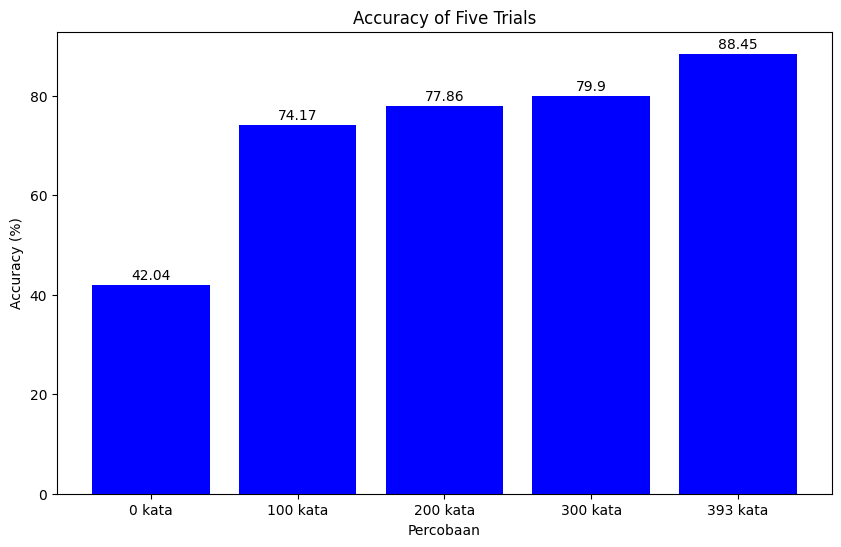

In [33]:
accuracies = [ACC0, ACC100, ACC200, ACC300, ACC393]

# Labels for the bars
labels = ['0 kata', '100 kata', '200 kata', '300 kata', '393 kata']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracies, color='blue')

# Add labels and title
plt.xlabel('Percobaan')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Five Trials')

# Add text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

# Show the chart
plt.show()